In [615]:
# Import dependencies
import pandas as pd
import numpy as np
import pymysql as mysql
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
import getpass

from scipy import stats

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder


warnings.filterwarnings('ignore')

### Connecting pandas to MySQL database

In [649]:
conn = mysql.connect(host='localhost',
                    port = int(3306),
                    user = 'root',
                    passwd=getpass.getpass('Enter password:'),
                    db="Airbnb_DB")

df = pd.read_sql_query("Show tables ", conn)
print(df)

Enter password:········
  Tables_in_airbnb_db
0            calendar
1            listings
2             reviews


# Calendar

In [650]:
# Sql statement to extract the Calender dataset
cal_df = pd.read_sql("select * from calendar", conn)
cal_df.head(5)

,listing_id,date,available,price,calendar_id
0,1483944,2016-02-01,f,None,1
1,8568567,2016-11-30,t,$140.00,2
2,8508341,2016-10-26,t,$150.00,3
3,1483944,2016-02-02,f,None,4
4,8568567,2016-12-01,t,$140.00,5


### Check Unique Number of listing ID 

In [651]:
cal_df["listing_id"].nunique()

2873

# EDA Analysis

In [5]:
cal_df.dtypes

listing_id      int64
date           object
available      object
price          object
calendar_id     int64
dtype: object

In [6]:
# change the data type
cal_df['date'] = pd.to_datetime(cal_df['date'])

# remove dollar sign and convert to float
cal_df['price'] = cal_df['price'].str.replace('$', '').str.replace(',','').astype(float)

In [7]:
cal_df.dtypes

listing_id              int64
date           datetime64[ns]
available              object
price                 float64
calendar_id             int64
dtype: object

In [8]:
# describe
cal_df.describe()


,listing_id,price,calendar_id
count,1.048575e+06,699862.000000,1.048575e+06
mean,5.514651e+06,140.455483,5.242880e+05
std,2.961850e+06,106.492298,3.026977e+05
min,3.335000e+03,10.000000,1.000000e+00
25%,3.245876e+06,75.000000,2.621445e+05
50%,6.076158e+06,110.000000,5.242880e+05
75%,8.000037e+06,168.000000,7.864315e+05
max,1.034016e+07,1650.000000,1.048575e+06


In [9]:
# shape of the dataframe
print(f'calendar dataframe shape {cal_df.shape}')

calendar dataframe shape (1048575, 5)


In [10]:
# print the null values of calendar dataset
cal_df.isnull().sum()

listing_id          0
date                0
available           0
price          348713
calendar_id         0
dtype: int64

In the calendar dataset we have 348713 null values for the `price` column which, indicates that the listing was unavailable for particular days. We do not consider removing those columns.

In [11]:
# let's find out the first date and last of listing in calendar dataset 
first_date = cal_df["date"].min()
last_date = cal_df['date'].max()
print(f'The first date of listing is: {first_date}')
print(f'The first date of listing is: {last_date}')


The first date of listing is: 2016-01-04 00:00:00
The first date of listing is: 2017-01-02 00:00:00


### What is the average price of listings? 

Text(0, 0.5, 'Price ($)')

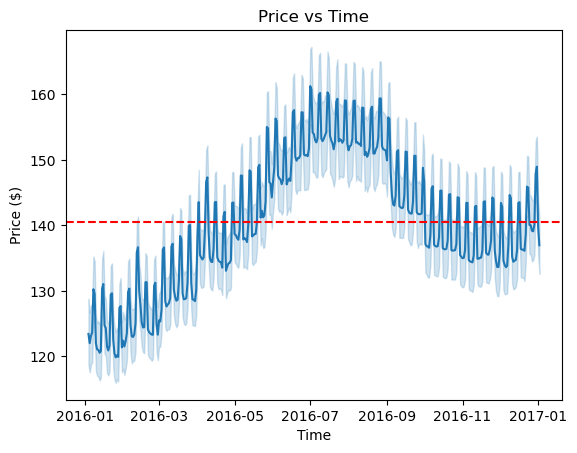

In [12]:
average_price = cal_df['price'].mean()

ax = sns.lineplot(x = "date", y = "price", data = cal_df)
ax.axhline(y=average_price, color='r', linestyle='--', label='Average Price')
plt.title('Price vs Time')
plt.xlabel('Time')
plt.ylabel('Price ($)')

As we can see from the above chart, the average price for listing is around 140$. The prices goes up during summer (June, July, August, and September) which is an indication of seasonality. 

### The price distribution

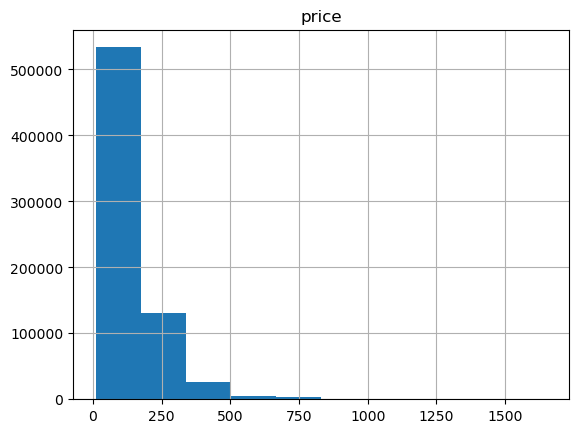

In [13]:
cal_df.hist(column='price')
plt.show()

The majority of the prices are clustered between 0 to 270$

### Which months have the highest availability during the year? 

In [14]:
cal_df['available'] = cal_df['available'].replace({ 't': 1, 'f': 0 })
cal_df

,listing_id,date,available,price,calendar_id
0,241032,2016-01-04,1,85.0,1
1,241032,2016-01-05,1,85.0,2
2,241032,2016-01-06,0,NaN,3
3,241032,2016-01-07,0,NaN,4
4,241032,2016-01-08,0,NaN,5
...,...,...,...,...,...
1048570,8568567,2016-11-25,1,190.0,1048571
1048571,8568567,2016-11-26,1,190.0,1048572
1048572,8568567,2016-11-27,1,140.0,1048573
1048573,8568567,2016-11-28,1,140.0,1048574


<AxesSubplot:xlabel='date'>

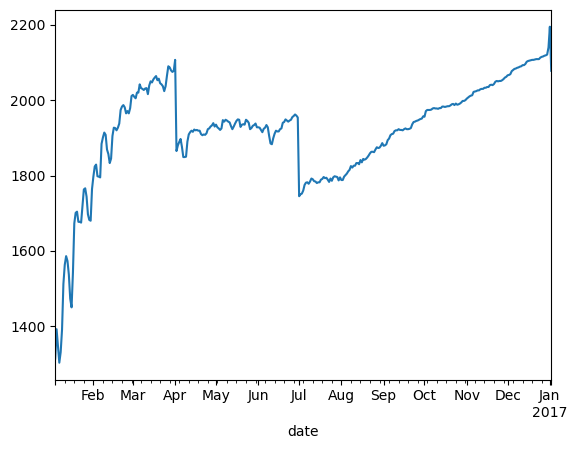

In [15]:
availability_df = cal_df.groupby('date').sum()['available']
availability_df.plot(kind='line')

Booking numbers start increasing from Jan till end of March, the we can see a huge drop in April. Another drop we can see in July but, after July the booking rate starts increasing

# Reviews

In [393]:
# Sql statement to extract the Calender dataset
rev_df = pd.read_sql("select * from reviews", conn)
rev_df.head(5)

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [405]:
rev_df.shape

(84849, 6)

In [406]:
rev_df["listing_id"].nunique()

3191

In [18]:
rev_df.head(5)

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [19]:
# change the column name
rev_df.rename(columns={'id': 'review_id'}, inplace=True)


In [20]:
# shape of the dataframe
print(f'calendar dataframe shape {rev_df.shape}')

calendar dataframe shape (84849, 6)


In [21]:
rev_df.isnull().sum()

listing_id        0
review_id         0
date              0
reviewer_id       0
reviewer_name     0
comments         18
dtype: int64

We have 18 null values in the `comments` column. 

We have a small number of null values, removing those rows may be a reasonable option. We use dropna() function to remove rows with null values

In [22]:
# drop null values in comments column
rev_df_clean = rev_df.dropna(subset=['comments'])

In [23]:
# Check the shape of the dataframe after removing the null values
print(f'calendar dataframe shape {rev_df_clean.shape}')

calendar dataframe shape (84831, 6)


### Sentimental Analysis to find out positive and negative comments


In [24]:
from textblob import TextBlob


# Define a function to get the sentiment polarity of each comment
def get_sentiment(comment):
    blob = TextBlob(comment)
    return blob.sentiment.polarity

# Create a new column with the sentiment label and use the sentiment label function on the "sentiment" column
rev_df_clean["sentiment"] = rev_df_clean["comments"].apply(get_sentiment)

# Define a function to map the polarity score to a "positive" or "negative" label
def get_sentiment_label(score):
    if score >= 0:
        return "positive"
    else:
        return "negative"

# Apply the sentiment label function to the "sentiment" column and create a new column with the sentiment label
rev_df_clean["sentiment_label"] = rev_df_clean["sentiment"].apply(get_sentiment_label)

rev_df_clean

,listing_id,review_id,date,reviewer_id,reviewer_name,comments,sentiment,sentiment_label
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...,0.433333,positive
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...,0.301136,positive
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb...",0.410417,positive
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...,0.358333,positive
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...,0.493485,positive
...,...,...,...,...,...,...,...,...
84844,3624990,50436321,2015-10-12,37419458,Ryan,The description and pictures of the apartment ...,0.194844,positive
84845,3624990,51024875,2015-10-17,6933252,Linda,We had an excellent stay. It was clean and com...,0.311111,positive
84846,3624990,51511988,2015-10-20,19543701,Jaime,"Gran ubicación, cerca de todo lo atractivo del...",0.000000,positive
84847,3624990,52814482,2015-11-02,24445024,Jørgen,"Very good apartement, clean and well sized. Si...",0.216852,positive


<AxesSubplot:xlabel='sentiment_label'>

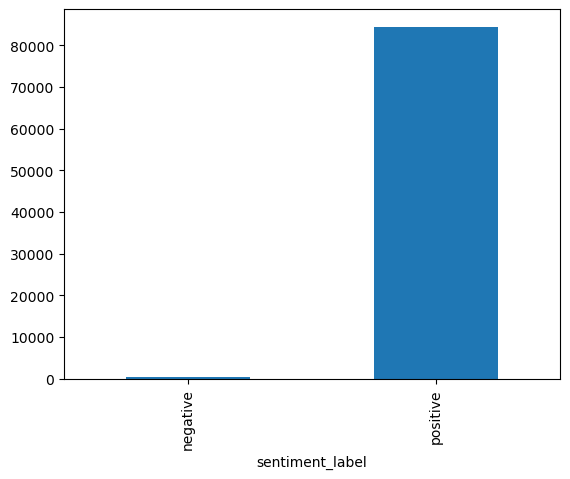

In [25]:
rev_df_clean.groupby('sentiment_label').count()['sentiment'].plot(kind='bar')

As we can see the above bar chart most of the users wrote positive comments for the hosts.

# Listings

In [574]:
# Sql statement to extract the Calender dataset
list_df = pd.read_sql("select * from listings", conn)
display(list_df)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,3335,https://www.airbnb.com/rooms/3335,20200000000000,2016-01-04,Sweet Seattle Urban Homestead 2 Bdr,Welcome! If you stay here you will be living i...,Welcome! Come enjoy your time in Seattle at a...,Welcome! If you stay here you will be living i...,none,This is a very diverse neighborhood with a var...,...,NaN,f,None,WASHINGTON,f,strict,f,f,4,NaN
1,4291,https://www.airbnb.com/rooms/4291,20200000000000,2016-01-04,Sunrise in Seattle Master Suite,None,"Located in Seattle, this is a spacious, clean...","Located in Seattle, this is a spacious, clean...",none,None,...,9.0,f,None,WASHINGTON,f,moderate,f,f,5,1.14
2,5682,https://www.airbnb.com/rooms/5682,20200000000000,2016-01-04,"Cozy Studio, min. to downtown -WiFi",The Cozy Studio is a perfect launchpad for you...,"Hello fellow travelers, Save some money and ha...",The Cozy Studio is a perfect launchpad for you...,none,None,...,10.0,f,None,WASHINGTON,t,strict,f,t,1,4.21
3,6606,https://www.airbnb.com/rooms/6606,20200000000000,2016-01-04,"Fab, private seattle urban cottage!",None,"Soo centrally located, this is a little house ...","Soo centrally located, this is a little house ...",none,"A peaceful yet highly accessible neighborhood,...",...,9.0,f,None,WASHINGTON,f,strict,f,f,1,0.66
4,7369,https://www.airbnb.com/rooms/7369,20200000000000,2016-01-04,launchingpad/landingpad,contemporary condo on the western edge of pike...,spacious condo with all the amenities,contemporary condo on the western edge of pike...,none,Pike/Pine is the most urban neighborhood in se...,...,9.0,f,None,WASHINGTON,f,flexible,f,f,1,0.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3812,10332096,https://www.airbnb.com/rooms/10332096,20200000000000,2016-01-04,Room & bath in suburban N Seattle,"Includes use of public space with lots of art,...",None,"Includes use of public space with lots of art,...",none,None,...,NaN,f,None,WASHINGTON,f,flexible,f,f,1,NaN
3813,10334184,https://www.airbnb.com/rooms/10334184,20200000000000,2016-01-04,Historic Capitol Hill Garden Apt.,Perfectly situated off Broadway in a quiet par...,"One of the Hill's last historic spaces, this s...",Perfectly situated off Broadway in a quiet par...,none,Capitol Hill is the epicenter of the city for ...,...,NaN,f,None,WASHINGTON,f,flexible,f,f,1,NaN
3814,10339144,https://www.airbnb.com/rooms/10339144,20200000000000,2016-01-04,Studio in the heart of Capitol Hill,"This is a great 3 floor, old world charm build...","Built in 1926, this studio has Hardwood/tile f...","This is a great 3 floor, old world charm build...",none,"Great food, bars, and parks all within walking...",...,NaN,f,None,WASHINGTON,f,flexible,f,f,1,NaN
3815,10339145,https://www.airbnb.com/rooms/10339145,20200000000000,2016-01-04,West Seattle Beachfront Apartment,Beautifully updated 2 bedroom/2 bath entire ap...,Spacious in-city apartment with 2 bedrooms and...,Beautifully updated 2 bedroom/2 bath entire ap...,none,West Seattle is the city's gem of a neighborho...,...,NaN,f,None,WASHINGTON,t,strict,f,f,1,NaN


In [575]:
# let's see how many unique values we have for the lising id
list_df["id"].nunique()

3817

## Feature Engineering

### Capture Missing Values


In [576]:
mis_val = [x for x in list_df.columns if list_df[x].isnull().sum()>0]
list_df[mis_val].isnull().sum()

summary                         177
space                           568
neighborhood_overview          1031
notes                          1605
transit                         933
thumbnail_url                   320
medium_url                      320
xl_picture_url                  320
host_name                         2
host_since                        2
host_location                     8
host_about                      858
host_response_time              523
host_response_rate              523
host_acceptance_rate            773
host_is_superhost                 2
host_thumbnail_url                2
host_picture_url                  2
host_neighbourhood              299
host_listings_count               2
host_total_listings_count         2
host_has_profile_pic              2
host_identity_verified            2
neighbourhood                   415
zipcode                           7
property_type                     1
bathrooms                        16
bedrooms                    

We can see plenty of missing values for multiple columns. So, in order to avoid generating synthetic data for columns which have more than 60% missing values, we will drop those columns and perform feature engineering on the rest of the data.

### Dropping columns with more than 60% missing values

In [577]:
def drop_columns_with_max_missing_values(df):
    mis_var = [x for x in df.columns if df[x].isnull().sum() > 0]
    df[mis_var].isnull().sum()

    limit = np.abs((df.shape[0] * 0.6))
    var_to_be_dropped = [x for x in mis_var if df[x].isnull().sum() > limit]
    print('Columns with more than 60% missing values: \n\n', var_to_be_dropped)

    df.drop(columns=var_to_be_dropped, axis=1, inplace=True)
    return df

df = drop_columns_with_max_missing_values(list_df)

Columns with more than 60% missing values: 

 ['square_feet', 'monthly_price', 'license']


In [578]:
list_df.shape

(3817, 88)

Great! we dropped `square_feet`, `monthly_price`, `license`. As we can see the number of columns dropped from 91 to 88. 

### Remove the dollar signs and change the data type to float for `price`, `weekly_price`,`security_deposit`,`cleaning_fee`.

In [579]:
# List of columns with dollar signs
dollar_columns = ['price', 'weekly_price','security_deposit','cleaning_fee','extra_people']

# Remove dollar sign and convert to float for each column
for col in dollar_columns:
    list_df[col] = list_df[col].str.replace('$', '').str.replace(',', '').astype(float)

## Listings Visualization

### Analyzing the number of listing for each of the neighborhoods

In [641]:
neighboor_list_query = pd.read_sql("select neighbourhood_cleansed, count(*) as 'Count'\
                                    from listings \
                                   group by neighbourhood_cleansed \
                                   order by Count desc \
                                   limit 10;", conn)
neighboor_list_query

,neighbourhood_cleansed,Count
0,Broadway,397
1,Belltown,234
2,Wallingford,167
3,Fremont,158
4,Minor,134
5,University District,122
6,Stevens,119
7,First Hill,108
8,Central Business District,103
9,Lower Queen Anne,94


In [644]:
neighboor_list_query.rename(columns={"neighbourhood_cleansed":"Neighbourhood"},inplace=True)

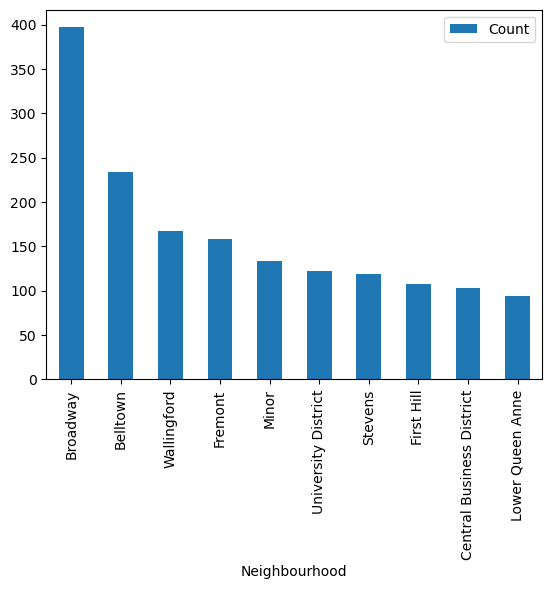

In [645]:
ax = neighboor_list_query.plot(x="Neighbourhood", y="Count", kind="bar")

These areas have the highest number of listings among the other areas.

### Top 10 Neighbourhood with Highest Average Price

In [582]:
neighboor_price = list_df.groupby('neighbourhood_cleansed').mean()["price"]
neighboor_price = neighboor_price.reset_index()
neighboor_price
neighboor_price.rename(columns={"neighbourhood_cleansed":"Neighbourhood", "price":"average price"},inplace=True)
neighboor_price10 = neighboor_price.sort_values(by="average price",ascending=False).head(10)
neighboor_price10

,Neighbourhood,average price
73,Southeast Magnolia,231.705882
61,Portage Bay,227.857143
83,Westlake,194.470588
81,West Queen Anne,187.769231
48,Montlake,182.789474
6,Briarcliff,176.571429
75,Sunset Hill,176.055556
32,Industrial District,173.333333
1,Alki,171.619048
85,Windermere,169.900000


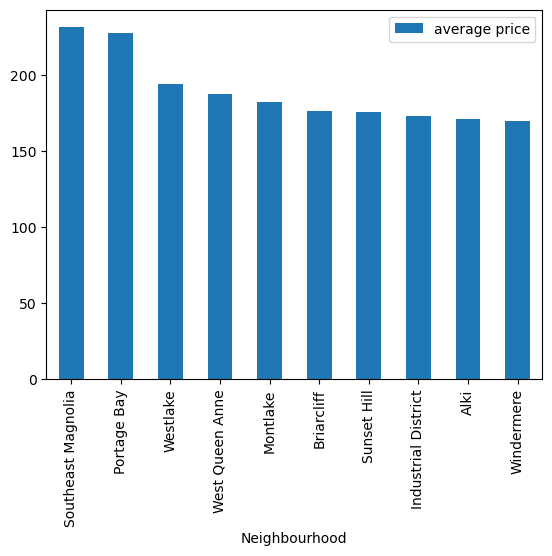

In [583]:
ax = neighboor_price10.plot(x="Neighbourhood", y="average price", kind="bar")

## Preparing `Listings` Dataset for Price Prediction

One may gather and preprocess relevant variables like location, property type, and amenities, and then use regression-based algorithms like linear regression, decision trees, or random forest to develop a prediction model to forecast Airbnb prices in Seattle. After being trained on historical data, the model might then be tested for accuracy using measures like mean absolute error or root mean square error.


In the given dataset, there are over 90 features/variables included, some of which may have a limited impact on predicting the price of Airbnb properties in Seattle. As such, we will identify and eliminate select columns with minimal predictive value.
To further improve the model's accuracy, we will use feature selection techniques to identify the most significant variables for predicting Airbnb prices in Seattle

In [584]:
drop_cols = ['id','name', 'listing_url','scrape_id', 'host_name','last_scraped','thumbnail_url','medium_url','xl_picture_url','host_id', \
             'host_url','notes', 'transit', 'picture_url','host_about','host_response_time','host_thumbnail_url','host_verifications','street','neighbourhood', \
             'neighbourhood_group_cleansed','host_response_time', 'host_since', 'zipcode','country','latitude','market', 'experiences_offered',\
             'longitude','weekly_price','calendar_updated', 'calendar_last_scraped', 'host_picture_url',\
             'first_review','last_review', 'calculated_host_listings_count','reviews_per_month','jurisdiction_names','amenities']


In [585]:
list_new_df = list_df.drop(drop_cols, axis = 1)
list_new_df.columns

Index(['summary', 'space', 'description', 'neighborhood_overview',
       'host_location', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_has_profile_pic',
       'host_identity_verified', 'neighbourhood_cleansed', 'city', 'state',
       'country_code', 'is_location_exact', 'property_type', 'room_type',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 'price',
       'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people',
       'minimum_nights', 'maximum_nights', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'requires_license',
       'instant_bookable'

### Convert the Values of The Columns that include `t` and `f` to `1` and `0`. 

In [586]:
string_columns =list_df.select_dtypes(include=['object']).columns

# Check if each value is 't' or 'f'
tf_columns = list_df[string_columns].applymap(lambda x: x == 't' or x == 'f')

tf_columns = tf_columns.any(axis=0)
tf_columns = tf_columns[tf_columns == True].index.tolist()
tf_columns

['host_is_superhost',
 'host_has_profile_pic',
 'host_identity_verified',
 'is_location_exact',
 'has_availability',
 'requires_license',
 'instant_bookable',
 'require_guest_profile_picture',
 'require_guest_phone_verification']

In [587]:
bool_cols = ['host_is_superhost',
 'host_has_profile_pic',
 'host_identity_verified',
 'is_location_exact',
 'has_availability',
 'requires_license',
 'instant_bookable',
 'require_guest_profile_picture',
 'require_guest_phone_verification']

for cols in bool_cols:
    list_new_df[cols] = list_new_df[cols].replace({ 't': 1, 'f': 0 })


### Remove the percentage icon of `host_response_rate` and `host_acceptance_rate` and convert to INT

In [588]:
list_new_df['host_response_rate'] = list_new_df['host_response_rate'].replace('N/A',0)
list_new_df['host_acceptance_rate'] = list_new_df['host_acceptance_rate'].replace('N/A',0)

list_new_df['host_response_rate'] = list_new_df['host_response_rate'].str.replace('%', '').astype(float)
list_new_df['host_acceptance_rate'] = list_new_df['host_acceptance_rate'].str.replace('%', '').astype(float)

In [589]:
# impute the mean of the column for NaN values (host_response_rate)
mean_value_response = list_new_df["host_response_rate"].mean()
list_new_df["host_response_rate"].fillna(value=mean_value_response,inplace=True)

In [590]:
# impute the mean of the column for NaN values (host_acceptance_rate)
mean_value_response = list_new_df["host_acceptance_rate"].mean()
list_new_df["host_acceptance_rate"].fillna(value=mean_value_response,inplace=True)

### Handle the missing values for Numerical data types ( Impute Mode )

In [591]:
num_col = list_new_df.select_dtypes(include=['int', 'float']).columns
for col in num_col:
    print(col,list_new_df[col].isnull().sum())

host_response_rate 0
host_acceptance_rate 0
host_is_superhost 2
host_listings_count 2
host_total_listings_count 2
host_has_profile_pic 2
host_identity_verified 2
is_location_exact 0
accommodates 0
bathrooms 16
bedrooms 6
beds 1
price 0
security_deposit 1951
cleaning_fee 1029
guests_included 0
extra_people 0
minimum_nights 0
maximum_nights 0
has_availability 0
availability_30 0
availability_60 0
availability_90 0
availability_365 0
number_of_reviews 0
review_scores_rating 647
review_scores_accuracy 658
review_scores_cleanliness 653
review_scores_checkin 658
review_scores_communication 651
review_scores_location 655
review_scores_value 656
requires_license 0
instant_bookable 0
require_guest_profile_picture 0
require_guest_phone_verification 0


In [592]:
for col in list_new_df.select_dtypes(include = ["int", "float"]):
    #check if column has null values
    if list_new_df[col].isnull().sum()>0:
        # Impute mode 
        list_new_df[col] = list_new_df[col].fillna(list_new_df[col].mode()[0])

In [593]:
num_col = list_new_df.select_dtypes(include=['int', 'float']).columns
for col in num_col:
    print(col,list_new_df[col].isnull().sum())

host_response_rate 0
host_acceptance_rate 0
host_is_superhost 0
host_listings_count 0
host_total_listings_count 0
host_has_profile_pic 0
host_identity_verified 0
is_location_exact 0
accommodates 0
bathrooms 0
bedrooms 0
beds 0
price 0
security_deposit 0
cleaning_fee 0
guests_included 0
extra_people 0
minimum_nights 0
maximum_nights 0
has_availability 0
availability_30 0
availability_60 0
availability_90 0
availability_365 0
number_of_reviews 0
review_scores_rating 0
review_scores_accuracy 0
review_scores_cleanliness 0
review_scores_checkin 0
review_scores_communication 0
review_scores_location 0
review_scores_value 0
requires_license 0
instant_bookable 0
require_guest_profile_picture 0
require_guest_phone_verification 0


### Handle the missing values for Categorical data types 

In [594]:
cat_vars = [var for var in list_new_df.columns if list_new_df[var].dtypes=='O']
for col in cat_vars:
    print(col,list_new_df[col].isnull().sum())

summary 177
space 568
description 0
neighborhood_overview 1031
host_location 8
host_neighbourhood 299
neighbourhood_cleansed 0
city 0
state 0
country_code 0
property_type 1
room_type 0
bed_type 0
cancellation_policy 0


In [595]:
# Drop columns if they have more than 20% missing values
def drop_columns_with_max_missing_values(df):
    cat_vars = [x for x in df.columns if df[x].isnull().sum() > 0]
    df[cat_vars].isnull().sum()

    limit = np.abs((df.shape[0] * 0.2))
    var_to_be_dropped = [x for x in cat_vars if df[x].isnull().sum() > limit]
    print('Columns with more than 20% missing values: \n\n', var_to_be_dropped)

df = drop_columns_with_max_missing_values(list_new_df)

Columns with more than 20% missing values: 

 ['neighborhood_overview']


In [596]:
# Drop `neighborhood_overview` column
list_new_df.drop("neighborhood_overview",axis=1,inplace=True)

In [597]:
#Drop the null value in property_type column which has one missing value
list_new_df = list_new_df.dropna(subset=['property_type','host_neighbourhood','summary','space','host_location'], axis=0)

In [599]:
cat_vars = [var for var in list_new_df.columns if list_new_df[var].dtypes=='O']
for col in cat_vars:
    print(col,list_new_df[col].isnull().sum())

summary 0
space 0
description 0
host_location 0
host_neighbourhood 0
neighbourhood_cleansed 0
city 0
state 0
country_code 0
property_type 0
room_type 0
bed_type 0
cancellation_policy 0


### Using Sentimental Analysis to convert Text to positive and negative categories 

In [600]:
from textblob import TextBlob


# Define a function to get the sentiment polarity of each comment
def get_sentiment(comment):
    blob = TextBlob(comment)
    return blob.sentiment.polarity

# Create a new column with the sentiment label and use the sentiment label function on the "sentiment" column
list_new_df["summary_sent"] = list_new_df["summary"].apply(get_sentiment)
list_new_df["space_sent"] = list_new_df["space"].apply(get_sentiment)
list_new_df["description_sent"] = list_new_df["description"].apply(get_sentiment)


# Define a function to map the polarity score to a "positive" or "negative" label
def get_sentiment_label(score):
    if score >= 0:
        return "positive"
    else:
        return "negative"
list_new_df.head()

,summary,space,description,host_location,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,...,review_scores_location,review_scores_value,requires_license,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,summary_sent,space_sent,description_sent
2,The Cozy Studio is a perfect launchpad for you...,"Hello fellow travelers, Save some money and ha...",The Cozy Studio is a perfect launchpad for you...,"Seattle, Washington, United States",100.000000,100.000000,0.0,South Delridge,1.0,1.0,...,9.0,10.0,0,1,strict,0,1,0.366667,0.204940,0.274513
4,contemporary condo on the western edge of pike...,spacious condo with all the amenities,contemporary condo on the western edge of pike...,"Seattle, Washington, United States",94.897389,99.967148,0.0,Broadway,1.0,1.0,...,10.0,9.0,0,0,flexible,0,0,0.141667,0.000000,0.250918
5,This beautiful double room features a magical ...,Our new Sunny space has a private room from th...,This beautiful double room features a magical ...,"Seattle, Washington, United States",100.000000,100.000000,0.0,Georgetown,5.0,5.0,...,9.0,9.0,0,0,strict,1,1,0.302083,0.249498,0.251813
6,"Great location, 98% walk score, next to the Co...",Greetings from Seattle! Thanks for considerin...,"Great location, 98% walk score, next to the Co...","Seattle, Washington, United States",100.000000,100.000000,1.0,First Hill,2.0,2.0,...,10.0,10.0,0,1,moderate,0,0,0.411429,0.290132,0.350818
7,The Sweet Orange is a delightful and spacious ...,"The Sweet Orange invites you to stay and play,...",The Sweet Orange is a delightful and spacious ...,"Seattle, Washington, United States",100.000000,100.000000,1.0,The Junction,2.0,2.0,...,10.0,10.0,0,0,strict,0,1,0.312500,0.275350,0.292238


In [601]:
# Drop the unnecessary columns after using sentimental analysis
list_new_df.drop(['summary', 'space', 'description'],axis=1,inplace=True)

In [602]:
# Since we are using only Seattle city and state, we decided to drop the `state`, `city`, `country_code` and `host_location`.
list_new_df.drop(['city', 'state','country_code','host_location','host_neighbourhood','neighbourhood_cleansed'],axis=1,inplace=True)

In [603]:
list_new_df

,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,is_location_exact,property_type,room_type,...,review_scores_location,review_scores_value,requires_license,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,summary_sent,space_sent,description_sent
2,100.000000,100.000000,0.0,1.0,1.0,1.0,1.0,1,Apartment,Entire home/apt,...,9.0,10.0,0,1,strict,0,1,0.366667,0.204940,0.274513
4,94.897389,99.967148,0.0,1.0,1.0,1.0,0.0,1,Condominium,Entire home/apt,...,10.0,9.0,0,0,flexible,0,0,0.141667,0.000000,0.250918
5,100.000000,100.000000,0.0,5.0,5.0,1.0,1.0,1,House,Private room,...,9.0,9.0,0,0,strict,1,1,0.302083,0.249498,0.251813
6,100.000000,100.000000,1.0,2.0,2.0,1.0,1.0,1,Bed & Breakfast,Private room,...,10.0,10.0,0,1,moderate,0,0,0.411429,0.290132,0.350818
7,100.000000,100.000000,1.0,2.0,2.0,1.0,1.0,1,House,Entire home/apt,...,10.0,10.0,0,0,strict,0,1,0.312500,0.275350,0.292238
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3803,100.000000,100.000000,0.0,5.0,5.0,1.0,1.0,1,Condominium,Entire home/apt,...,10.0,10.0,0,0,flexible,0,0,-0.033333,0.382407,0.233041
3804,80.000000,100.000000,0.0,3.0,3.0,1.0,0.0,1,Apartment,Entire home/apt,...,10.0,10.0,0,0,strict,0,0,0.216233,0.167556,0.203371
3813,94.897389,99.967148,0.0,1.0,1.0,1.0,0.0,1,Apartment,Entire home/apt,...,10.0,10.0,0,0,flexible,0,0,0.545000,0.240476,0.301875
3814,94.897389,99.967148,0.0,2.0,2.0,1.0,0.0,1,Apartment,Entire home/apt,...,10.0,10.0,0,0,flexible,0,0,0.412500,0.287500,0.371577


In [604]:
cat_vars = [var for var in list_new_df.columns if list_new_df[var].dtypes=='O']
for col in cat_vars:
    print(col,list_new_df[col].isnull().sum())

property_type 0
room_type 0
bed_type 0
cancellation_policy 0


In [605]:
list_new_df["property_type"].unique()

array(['Apartment', 'Condominium', 'House', 'Bed & Breakfast', 'Cabin',
       'Townhouse', 'Loft', 'Other', 'Chalet', 'Camper/RV', 'Boat',
       'Treehouse', 'Dorm', 'Tent', 'Bungalow', 'Yurt'], dtype=object)

### Encoding categorical variables

In [606]:
cat_variables = ["property_type","room_type","bed_type"]
cat_variables

['property_type', 'room_type', 'bed_type']

In [607]:
# Loop through categorical variables and craete dummy variables
for col in (cat_variables):
    dummies = pd.get_dummies(list_new_df[col], prefix = col, drop_first=True)
    list_new_df = pd.concat([list_new_df, dummies], axis = 1)
    list_new_df = list_new_df.drop(col, axis=1)

In [610]:
# The cancellation policy does not have impact on the price of the listing so we decide to remove it
list_new_df.drop("cancellation_policy",axis=1,inplace=True)

In [612]:
list_new_df

,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,is_location_exact,accommodates,bathrooms,...,property_type_Tent,property_type_Townhouse,property_type_Treehouse,property_type_Yurt,room_type_Private room,room_type_Shared room,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed
2,100.000000,100.000000,0.0,1.0,1.0,1.0,1.0,1,2,1.0,...,0,0,0,0,0,0,0,0,0,1
4,94.897389,99.967148,0.0,1.0,1.0,1.0,0.0,1,2,1.0,...,0,0,0,0,0,0,0,0,0,1
5,100.000000,100.000000,0.0,5.0,5.0,1.0,1.0,1,2,3.0,...,0,0,0,0,1,0,0,0,0,1
6,100.000000,100.000000,1.0,2.0,2.0,1.0,1.0,1,2,1.0,...,0,0,0,0,1,0,0,0,0,1
7,100.000000,100.000000,1.0,2.0,2.0,1.0,1.0,1,4,1.0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3803,100.000000,100.000000,0.0,5.0,5.0,1.0,1.0,1,4,1.0,...,0,0,0,0,0,0,0,0,0,1
3804,80.000000,100.000000,0.0,3.0,3.0,1.0,0.0,1,4,1.0,...,0,0,0,0,0,0,0,0,0,1
3813,94.897389,99.967148,0.0,1.0,1.0,1.0,0.0,1,2,1.0,...,0,0,0,0,0,0,0,0,0,1
3814,94.897389,99.967148,0.0,2.0,2.0,1.0,0.0,1,2,1.0,...,0,0,0,0,0,0,0,0,0,1


### Check Multicollinearity

In [634]:
corr = list_new_df.corr()
corr.style.background_gradient(cmap='coolwarm')

,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,is_location_exact,accommodates,bathrooms,bedrooms,beds,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,require_guest_profile_picture,require_guest_phone_verification,summary_sent,space_sent,description_sent,property_type_Bed & Breakfast,property_type_Boat,property_type_Bungalow,property_type_Cabin,property_type_Camper/RV,property_type_Chalet,property_type_Condominium,property_type_Dorm,property_type_House,property_type_Loft,property_type_Other,property_type_Tent,property_type_Townhouse,property_type_Treehouse,property_type_Yurt,room_type_Private room,room_type_Shared room,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed
host_response_rate,1.000000,-0.008032,0.142951,0.012868,0.012868,0.006551,0.070478,0.042642,-0.006098,-0.008810,-0.015180,0.006372,-0.039126,-0.030724,-0.073205,0.052885,-0.004839,-0.029715,-0.020763,nan,-0.031617,-0.016295,-0.010629,-0.067727,0.105858,0.123089,0.124032,0.143381,0.137974,0.117107,0.062428,0.127239,nan,0.089969,0.005628,0.007437,-0.006515,-0.059929,-0.032557,0.002491,0.007023,-0.010566,0.034867,0.018252,0.011661,-0.001776,0.008244,0.033276,0.030629,0.011972,0.002287,-0.007598,-0.010784,0.008244,0.019542,-0.035840,0.015516,-0.045701,-0.017248,0.034965
host_acceptance_rate,-0.008032,1.000000,0.011350,0.005090,0.005090,-0.000467,0.040803,-0.004531,0.013680,0.008437,0.006464,0.012617,0.006221,0.009493,0.017101,0.010496,0.012272,-0.007576,-0.003727,nan,-0.019480,-0.017422,-0.016221,-0.017253,0.010427,-0.014511,0.020636,-0.009424,-0.006360,-0.006061,-0.010638,0.013465,nan,-0.040215,0.006343,0.006867,0.030161,-0.025213,-0.024678,0.001783,0.000319,0.001409,0.001748,0.000951,0.000574,0.002898,0.000406,0.017125,0.001916,0.001599,0.000319,0.003321,0.000342,0.000406,0.011777,-0.112091,0.000951,0.002254,-0.178530,0.095052
host_is_superhost,0.142951,0.011350,1.000000,-0.068647,-0.068647,0.023160,0.134810,0.004674,-0.032844,-0.018260,-0.052497,-0.054408,-0.002234,0.040657,-0.046732,0.047130,0.026127,0.015613,-0.035963,nan,-0.006034,0.012946,0.022258,-0.026006,0.252580,0.193982,0.193569,0.201872,0.156814,0.147849,0.087141,0.183336,nan,0.071288,0.082030,0.082212,-0.024227,-0.017999,-0.029076,0.003882,-0.020712,-0.023160,0.082272,0.022680,-0.014640,-0.012427,-0.010350,0.026776,0.005813,-0.032062,-0.020712,-0.003775,0.016571,0.033781,0.037468,-0.051276,0.005982,-0.002632,-0.026060,0.022152
host_listings_count,0.012868,0.005090,-0.068647,1.000000,1.000000,0.009851,0.078187,-0.073471,0.121841,0.081041,0.072162,0.098870,0.086137,-0.044422,0.216507,-0.083992,-0.090457,0.025147,0.025544,nan,0.127928,0.134350,0.132685,0.123752,-0.081119,-0.038698,-0.087281,-0.007784,-0.097178,-0.053802,0.036605,-0.059362,nan,-0.058590,0.092620,0.079657,0.008202,0.027387,0.069186,-0.018934,-0.008185,-0.014738,-0.016952,-0.009060,-0.004902,-0.011762,-0.003778,-0.116430,-0.020356,0.082379,-0.005685,-0.035321,-0.004902,-0.004403,-0.106557,0.042019,-0.010242,-0.031221,0.014158,0.023084
host_total_listings_count,0.012868,0.005090,-0.068647,1.000000,1.000000,0.009851,0.078187,-0.073471,0.121841,0.081041,0.072162,0.098870,0.086137,-0.044422,0.216507,-0.083992,-0.090457,0.025147,0.025544,nan,0.127928,0.134350,0.132685,0.123752,-0.081119,-0.038698,-0.087281,-0.007784,-0.097178,-0.053802,0.036605,-0.059362,nan,-0.058590,0.092620,0.079657,0.008202,0.027387,0.069186,-0.018934,-0.008185,-0.014738,-0.016952,-0.009060,-0.004902,-0.011762,-0.003778,-0.116430,-0.020356,0.082379,-0.005685,-0.035321,-0.004902,-0.004403,-0.106557,0.042019,-0.010242,-0.

We observe high correlation among some of the feature variables from the above correlation plot. Hence we will drop some of the features and then build our model on top of that.

In [635]:
list_clean = list_new_df.drop(["availability_60","availability_90","has_availability","requires_license",\
                              "requires_license","require_guest_phone_verification","space_sent",\
                              "host_total_listings_count","accommodates","review_scores_rating"],axis=1)

In [636]:
list_clean

,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,is_location_exact,bathrooms,bedrooms,beds,...,property_type_Tent,property_type_Townhouse,property_type_Treehouse,property_type_Yurt,room_type_Private room,room_type_Shared room,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed
2,100.000000,100.000000,0.0,1.0,1.0,1.0,1,1.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,1
4,94.897389,99.967148,0.0,1.0,1.0,0.0,1,1.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,1
5,100.000000,100.000000,0.0,5.0,1.0,1.0,1,3.0,1.0,1.0,...,0,0,0,0,1,0,0,0,0,1
6,100.000000,100.000000,1.0,2.0,1.0,1.0,1,1.0,1.0,1.0,...,0,0,0,0,1,0,0,0,0,1
7,100.000000,100.000000,1.0,2.0,1.0,1.0,1,1.0,2.0,5.0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3803,100.000000,100.000000,0.0,5.0,1.0,1.0,1,1.0,1.0,2.0,...,0,0,0,0,0,0,0,0,0,1
3804,80.000000,100.000000,0.0,3.0,1.0,0.0,1,1.0,1.0,2.0,...,0,0,0,0,0,0,0,0,0,1
3813,94.897389,99.967148,0.0,1.0,1.0,0.0,1,1.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,1
3814,94.897389,99.967148,0.0,2.0,1.0,0.0,1,1.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,1


### Save the final file for model creation

In [637]:
list_clean.to_csv('final_airbnb_dataset.csv', index=False)